#**Prediction using supervised ML**
- Isha Roy @ Grip The Sparks Foundation

**Objectives:**
- Predicting the percentage of an student based on the no. of study hours.
- What will be predicted score if a student studies for 9.25 hrs/ day?

**Importing the Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

**Load the data**

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data - Sheet1.csv to data - Sheet1.csv


In [5]:
# Store the data in a dataframe
df = pd.read_csv('data - Sheet1.csv')

In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.8,76
24,7.8,86


**Data Cleaning**

In [8]:
df.shape

(25, 2)

In [9]:
#Detect missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Visualizing data**

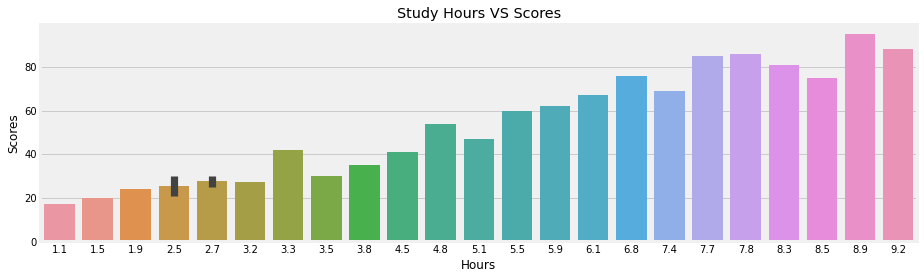

In [11]:
fig,axs=plt.subplots(ncols=1)
fig.set_size_inches(14,4)
sns.barplot(x='Hours',y='Scores',data=df)
axs.set_title('Study Hours VS Scores')
plt.show()

**Scatter Plot**

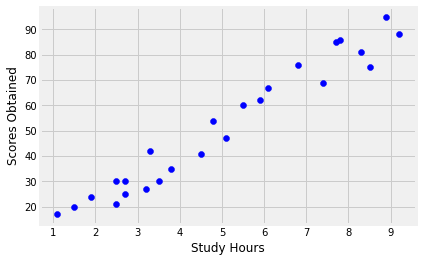

In [12]:
x = df['Hours']
y = df['Scores']
plt.scatter(x,y,color='blue')
plt.xlabel('Study Hours')
plt.ylabel('Scores Obtained')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

**Preparing the data**

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)
lnr = LinearRegression()
lnr.fit(x_train,y_train)
predicted_y = lnr.predict(x_test)
print("predicted y records:")
print(predicted_y)

predicted y records:
[37.61808586 27.96020647 83.9759069 ]


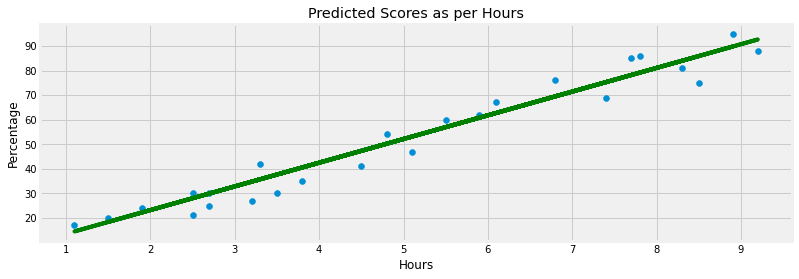

In [16]:
plt.figure(figsize=(12,4))
reg = lnr.coef_*x+lnr.intercept_
plt.scatter(x,y)
plt.plot(x, reg, color='green')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.title('Predicted Scores as per Hours')
plt.show()

**Making Predictions**

In [17]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
print("RMSE is:-")
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, predicted_y))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predicted_y)))

RMSE is:-
Mean Absolute Error(MAE): 5.851399744580877
Root Mean Squared Error(RMSE): 6.200422786110781


In [18]:
y_pred = lnr.predict(x_test)
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2

,Actual,Predicted
0,30,37.618086
1,21,27.960206
2,81,83.975907


**Prediction for 9.25 hours**

In [19]:
hours = 9.25
scores = lnr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(scores[0]))

No of Hours = 9.25
Predicted Score = 93.15089231797975


**Evaluating the Model**

In [21]:
  print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.851399744580877
